#### Q1: 5.6

Which of the following statements is not a condition of the ANOVA model?

b. Error terms are all positive.

#### Q2: 5.14

##### (a)


One-way ANOVA uses the mean of two or more groups for the computation. The necessary conditions are:

i. Error terms of the different groups are independent of each other

ii. Error terms of the different groups follow a normal distribution and have constant variance 

If we satisfy these conditions, we can use ANOVA for statistical analysis of four groups.



##### (b)

Here, the independent response variable is the age of cars. These are numbers and quantitative responses.

So, we can use ANOVA.

##### (c)


One-way ANOVA does not assume that the sample sizes of different groups are equal. Therefore, different sample sizes do not make any difference. It is quite usual for observational studies to have different sample sizes. 

We can perform ANOVA with unequal sample sizes.

##### (d)


We can generalise the results to the entire population at the college, but only to a certain level of confidence. By using the F-test statistic (value) from the one-way ANOVA, we can conclude with a 95% confidence level at a significance level of 0.05 if there is a significant difference in the mean of the groups or not (with respect to the age of cars).

#### Q3: 5.16

##### (a)


The response variable is the amount of energy that the dog has (the average amount of time the dog sleeps).

The explanatory variables are the three different groups (category) of the main ingredient in dog food, i.e., salmon, chicken, and beef.

##### (b)

This is a randomized experiment because we can determine the cause and effect as the researcher randomly assigns dogs to each of the three groups/categories (cause) and measures the outcome (effect) of the experiment.

##### (c)

Yes, it is still appropriate because the researcher considered the property of constant variance (homoginity), i.e., the sample population of dogs is selected from the same pupulation group of dogs, "Border Collies."

Therefore, we can use ANOVA to conduct the analysis of variance.

#### Q4: 5.18

##### (a)

The number of units in this experiment is the number of dogs: 45. 


##### (b)

The treatments are the levels of the explanatory variable, the main ingredient of dog food: Salmon, Chicken, and Beef.

##### (c)

The researcher should randomly pick 45 "Border Collies" dogs from a population of "Border Collies" dogs and then assign those samples into three groups (treatments), Salmon, Chicken, and Beef, of equal sizes.

#### Q5: 5.34 

##### (c)

Null hypothesis, $H_{0}$: The (average) amounts of honeydew produced by aphids is the same for different combinations of type of aphid and type of host plant

Alternative hypothesis, $H_{1}$: The (average) amounts of honeydew produced by aphids is different for different combinations of type of aphid and type of host plant

Here, p-value = 0.000

As p-value < 0.05, we can reject the null hypothesis at the 0.05 level of significance .

Therefore, we can conclude that the (average) amounts of honeydew produced by aphids is different for different combinations of type of aphid and type of host plant.

#### Q6: 5.40

In [1]:
# read csv file
menisc_df = read.csv('ex05-40Menisc.csv', header=T)
dim(menisc_df)
head(menisc_df)
# Fit ANOVA model 
model = aov(Displacement~factor(Method), data=menisc_df)

[1] 18  4

,Method,FailureLoad,Displacement,Stiffness
,<int>,<dbl>,<dbl>,<dbl>
1,1,97.3,16.9,8.3
2,1,106.4,20.2,7.2
3,1,118.2,20.1,6.3
4,1,99.7,15.7,7.3
5,1,106.5,13.9,8.7
6,1,84.2,14.9,8.7


##### (a) Hypothesis Testing in ANOVA

Null hypothesis, $H_{0}: \alpha_1=\alpha_2=\alpha_3$

Alternative hypothesis, $H_{1}$: atleast one $\alpha_i \neq \alpha_j$ 

##### (b) Conditions for ANOVA & F-test 

- The experiment is independent and randomized.

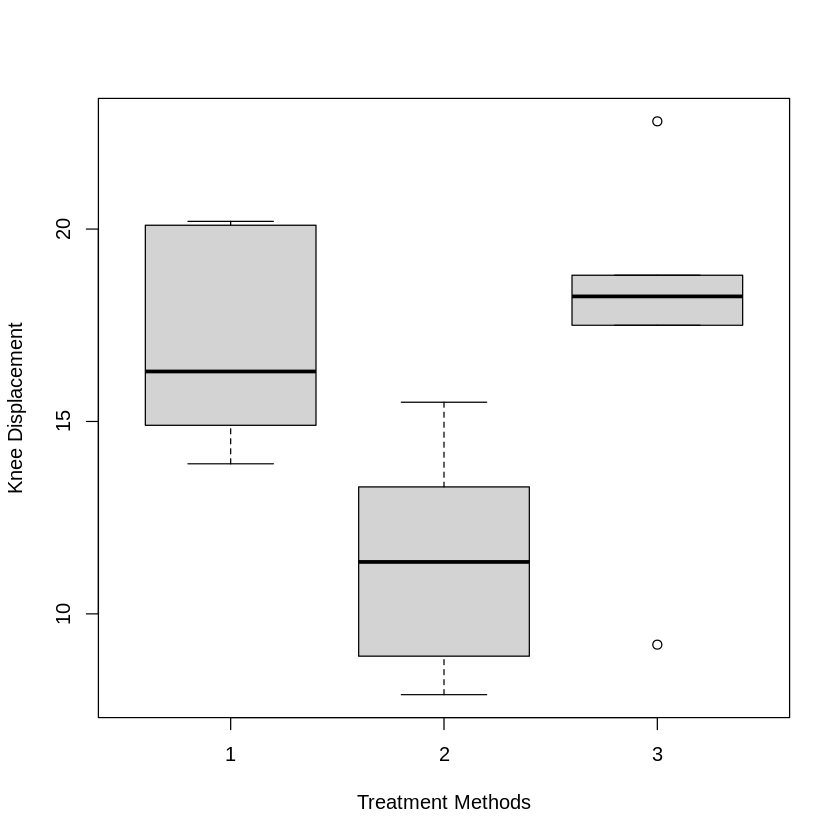

In [2]:
# Exploratory Data Analysis (Variability in sample groups) - Boxplot 
boxplot(Displacement~Method, data=menisc_df, ylab='Knee Displacement', xlab='Treatment Methods')

The variability in Method 1 and Method 2 are similar whereas the variability in Method 3 is different than the other two groups.

Lets check standard deiviations of each group and compare  𝑆𝑚𝑖𝑛  and  𝑆𝑚𝑎𝑥:

In [3]:
# SD of Method-1
round(sd(menisc_df$Displacement[menisc_df$Method=='1']),2)

[1] 2.67

In [4]:
# SD of Method-2
round(sd(menisc_df$Displacement[menisc_df$Method=='2']),2)

[1] 2.88

In [5]:
# SD of Method-3
round(sd(menisc_df$Displacement[menisc_df$Method=='3']),2)

[1] 4.47

$S_{max}=4.47$

$S_{min}=2.67$

$\frac{S_{max}}{S_{min}} = \frac{4.47}{2.67} < 2$

We can assume that the residuals have the same variability in each group. However, $\frac{S_{max}}{S_{min}}$ is very close to 2.
 

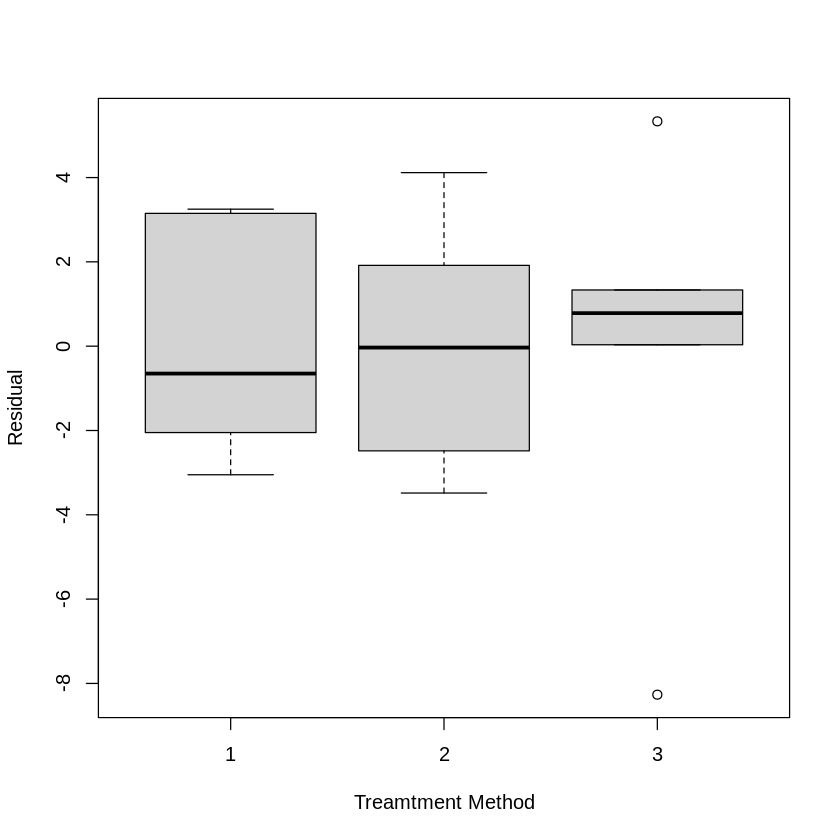

In [6]:
# Variability of residuals in each group (Optional- infers the same info as the box plot above)
boxplot(model$residuals~menisc_df$Method, ylab='Residual', xlab='Treamtment Method')

- Therefore, the assumption that the residuals have the same variability in each group is satisfied.

Lets check the normality.

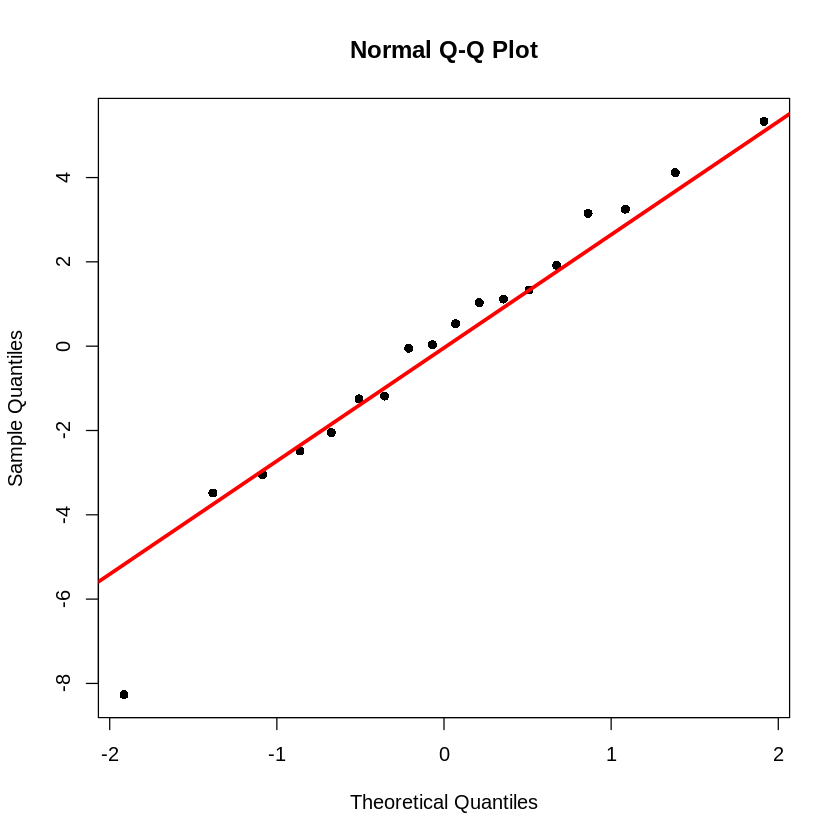

In [7]:
# Normal Probability plot
qqnorm(model$residuals, pch=16)
qqline(model$residuals, col="red", lwd=3)

We can see that the residual are normally distributed.

- Therefore, the assumption that the residuals are normally distributed is satisfied.

Values are taken from the ANOVA table 

SSGroups = 136.5

SSE = 177.0 

DF_Groups = 3 - 1 = 2

DF_Error = 18 - 3 = 15

MSGroups = SSGropus / DF_Groups = 136.5 / 2 = 68.26

MSE = SSE / DF_Error = 177.0 / 15 = 11.80

 F-test: MSGroups / MSE

        = 68.26 / 11.80

        = 5.784
        

Thus, we can go ahead with the inference of the experiment.

##### (c) Decision

In [8]:
summary(model)

               Df Sum Sq Mean Sq F value Pr(>F)  
factor(Method)  2  136.5   68.26   5.784 0.0137 *
Residuals      15  177.0   11.80                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

p-value < 0.05

Thus, we reject $H_{0}$ at a 0.05 level of significance.

We can conclude that there is evidence that displacement differs based on the type of meniscus repair (treatment method), but not strongly (some groups may have same mean).

Furthermore, we can identify which differences lead to the rejection.

In [9]:
#install.packages('agricolae')

In [10]:
library(agricolae)
m = LSD.test(model, "factor(Method)", p.adj="bonferroni", group=F)
m

$statistics
   MSerror Df     Mean       CV  t.value      MSD
  11.80244 15 15.26667 22.50307 2.693739 5.342948

$parameters
        test  p.ajusted         name.t ntr alpha
  Fisher-LSD bonferroni factor(Method)   3  0.05

$means
  Displacement      std r       LCL      UCL  Min  Max    Q25   Q50    Q75
1     16.95000 2.666646 6 13.960590 19.93941 13.9 20.2 15.100 16.30 19.300
2     11.38333 2.883343 6  8.393924 14.37274  7.9 15.5  9.225 11.35 13.100
3     17.46667 4.470198 6 14.477257 20.45608  9.2 22.8 17.625 18.25 18.725

$comparison
      difference pvalue signif.        LCL        UCL
1 - 2  5.5666667 0.0399       *   0.223719 10.9096143
1 - 3 -0.5166667 1.0000          -5.859614  4.8262810
2 - 3 -6.0833333 0.0235       * -11.426281 -0.7403857

$groups
NULL

attr(,"class")
[1] "group"

With a 95% confidence interval, the mean of Method 1 & Method 2 and the mean of Method 2 & Method 3 do not overlap, which could be the reason for the rejection of the null hypothesis. Otherwise, the mean of Method 1 & Method 3 overlap, which could suggest why the p-value is not extremely small and the evidence is not strong.